<h2>Autonomous Taxi Agent</h2>
<h4>In this notebook, I will implement the Q-learning algorithm from scratch</h4>

In [18]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [19]:
env = gym.make('Taxi-v3')

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [20]:
! pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [22]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [23]:
from IPython import display
from pyvirtualdisplay import Display
from matplotlib import animation

d = Display()
d.start()

Episode: 9
Score: -767


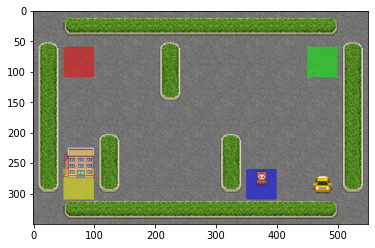

In [24]:
episodes = 10

for episode in range(1, episodes):
  state = env.reset()
  done = False
  score = 0
  prev_screen = env.render(mode='rgb_array')
  plt.imshow(prev_screen)
  img = []
  while not done:
    next_state, reward, done, info = env.step(env.action_space.sample())
    score += reward
    display.clear_output(wait=True)
    img.append(env.render('rgb_array'))
  print('Episode: {}\nScore: {}'.format(episode, score))


In [25]:
'''dpi = 72
interval = 50 # ms

plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
display.display(display.HTML(ani.to_jshtml()))'''

"dpi = 72\ninterval = 50 # ms\n\nplt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)\npatch = plt.imshow(img[0])\nplt.axis=('off')\nanimate = lambda i: patch.set_data(img[i])\nani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)\ndisplay.display(display.HTML(ani.to_jshtml()))"

<h2>Implement the Q-Learning Algorithm from scratch:</h2>

In [26]:
actions = env.action_space.n
state = env.observation_space.n

q_table = np.zeros((state, actions))

<h3>Create the Parameters for our Q-Learning Algorithm:</h3>

In [27]:
num_episodes = 10000
max_steps_per_episode = 100
learning_rate = .1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

rewards_all_episodes = []

<h4>The update function of the Q-Table:</h4>

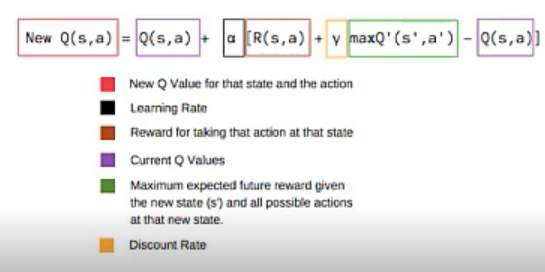

In [28]:
for episode in range(num_episodes):
  state = env.reset()
  done = False
  rewards_cur_episode = 0

  for step in range(max_steps_per_episode):

    #Exploration Vs Exploitation trade-off
    exploration_threshold = np.random.uniform(0, 1)
    # if greater than then we will take an action based on the q_table
    if exploration_threshold > exploration_rate:
      action = np.argmax(q_table[state,:])
    else:
      action = env.action_space.sample()

    next_state, reward, done, info = env.step(action)

    #Update Q-Table
    #the equation in the image above is without multipluing q_table[state, action] with (1-learning_rate)
    #this is a variation of the previous equation (most common used)
    q_table[state, action] = q_table[state, action]*(1-learning_rate) + learning_rate*(reward + discount_rate*np.max(q_table[next_state, :]))

    state = next_state
    rewards_cur_episode += reward

    if done == True:
      break

  #A mathemalical equation to decay the exploration rate over time so we start take action from our Q-Table instead of taking random action
  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

  rewards_all_episodes.append(rewards_cur_episode)

print("*******Training Finished*******")

*******Training Finished*******


In [29]:
q_table

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.99296278e+00,  1.15053166e-02, -2.10064498e-01,
         1.36619121e+00,  9.62206970e+00, -4.46271140e+00],
       [ 3.81050036e+00,  4.67779577e+00, -1.03721323e-01,
         2.99901745e+00,  1.41188060e+01, -2.41364347e+00],
       ...,
       [-1.44481122e+00,  3.43107850e+00, -1.53153994e+00,
        -1.30338735e+00, -7.13021281e+00, -8.20763461e+00],
       [-2.74290670e+00, -2.66060005e+00, -2.76218849e+00,
         1.65799725e+00, -8.63492533e+00, -8.89711460e+00],
       [ 2.98409454e+00, -5.45748671e-01,  5.07648917e+00,
         1.82659720e+01, -1.41531516e+00,  4.70882187e-03]])

<h3>Evaluating the Model:</h3>

In [30]:
rewards_per_1000_episodes = np.split(np.array(rewards_all_episodes), num_episodes/1000)
cnt = 1000

print("Average per thousand episodes")
for r in rewards_per_1000_episodes:
  print(cnt, ": ", str(sum(r/1000)))
  cnt += 1000


Average per thousand episodes
1000 :  -250.94899999999978
2000 :  -37.76500000000012
3000 :  2.077999999999993
4000 :  5.6799999999999775
5000 :  6.8019999999999685
6000 :  7.002999999999962
7000 :  7.532999999999967
8000 :  7.558999999999965
9000 :  7.3449999999999465
10000 :  7.508999999999972


step:  11  reward:  20
******Reached Goal******


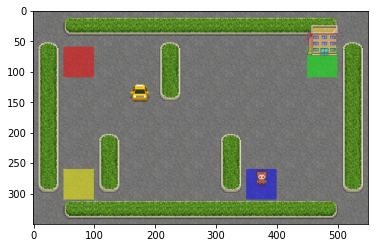

In [39]:
for episode in range(30):
  state = env.reset()
  done = False
  print("Episode: ", episode)

  prev_screen = env.render(mode='rgb_array')
  plt.imshow(prev_screen)
  img = []
  for step in range(max_steps_per_episode):
    action = np.argmax(q_table[state, :])

    next_state, reward, done, info = env.step(action)

    display.clear_output(wait=True)
    img.append(env.render('rgb_array'))

    print("step: ", step, " reward: ", reward)
    

    if done:
      #display.clear_output(wait=True)
      if reward == 20:
        print("******Reached Goal******")
      else:
        print("******Failed******")
      img.append(env.render('rgb_array'))

      break
    state = next_state

env.close()

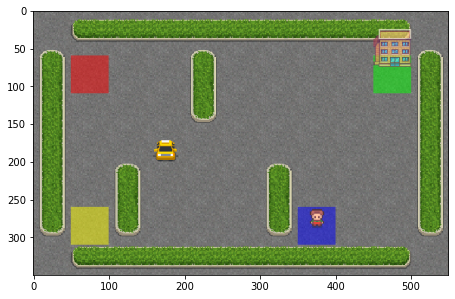

In [40]:
dpi = 72
interval = 50 # ms

plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
display.display(display.HTML(ani.to_jshtml()))